In [4]:
words = open('repo\\names.txt').read().splitlines()

In [2]:
print(f'Stats about our data set\n-------------')
print(f'Total amount of lines/names: {len(words)}')
print(f'Smallest name size: {min(len(w) for w in words)}')
print(f'Largest name size: {max(len(w) for w in words)}')

Stats about our data set
-------------
Total amount of lines/names: 32033
Smallest name size: 2
Largest name size: 15


In [5]:
# First we want to build a bigram language model. In other words, a model which predicts the next character based on the current character.
for w in words[:1]:
    chs = ['<S>'] + list(w) + ['<E']
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2)

<S> e
e m
m m
m a
a <E


In [6]:
b = {}
for w in words:
    word = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(word, word[1:]):
        bigram = ch1 + ch2
        b[bigram] = b.get(bigram,0) + 1

In [5]:
print('Stats about our bigrams\n------------')
print(b.items())
print(f'Most used bigram (may have some with the same usage): {sorted(b.items(), key= lambda kv: kv[1])[len(b.items()) - 1:]}')
print(f'Least used bigram (may have some with the same usage): {sorted(b.items(), key= lambda kv: kv[1])[0]}')

Stats about our bigrams
------------
dict_items([('<S>e', 1531), ('em', 769), ('mm', 168), ('ma', 2590), ('a<E>', 6640), ('<S>o', 394), ('ol', 619), ('li', 2480), ('iv', 269), ('vi', 911), ('ia', 2445), ('<S>a', 4410), ('av', 834), ('va', 642), ('<S>i', 591), ('is', 1316), ('sa', 1201), ('ab', 541), ('be', 655), ('el', 3248), ('ll', 1345), ('la', 2623), ('<S>s', 2055), ('so', 531), ('op', 95), ('ph', 204), ('hi', 729), ('<S>c', 1542), ('ch', 664), ('ha', 2244), ('ar', 3264), ('rl', 413), ('lo', 692), ('ot', 118), ('tt', 374), ('te', 716), ('e<E>', 3983), ('<S>m', 2538), ('mi', 1256), ('am', 1634), ('me', 818), ('<S>h', 874), ('rp', 14), ('pe', 197), ('er', 1958), ('r<E>', 1377), ('ev', 463), ('ve', 568), ('ly', 1588), ('yn', 1826), ('n<E>', 6763), ('bi', 217), ('ig', 428), ('ga', 330), ('ai', 1650), ('il', 1345), ('l<E>', 1314), ('y<E>', 2007), ('iz', 277), ('za', 860), ('et', 580), ('th', 647), ('h<E>', 2409), ('ry', 773), ('of', 34), ('fi', 160), ('ca', 815), ('ri', 3033), ('sc', 60)

In [8]:
# we want to use two dimensions array rather than python dictionary. For that we use a library named pytorch
import torch

In [9]:
# we build an array that can countains our bigram. The dimensions of our array are 28 since there are 26 characters + 2 special starting/ending characters.
N = torch.zeros((26+2,26+2), dtype=torch.int32)

In [10]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27

In [11]:
for w in words:
    word = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(word, word[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] +=1 

In [12]:
# import this library to better vizualize
import matplotlib.pyplot as plt
%matplotlib inline

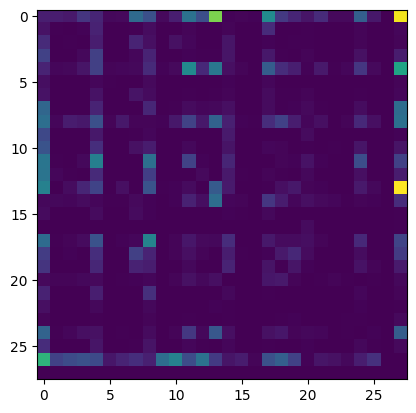

In [11]:
plt.imshow(N)

In [13]:
# let's create something allowing us to invert the array to it's origin data
# since stoi means (s to i) let's make a itos (i to s)
itos = {i:s for s,i in stoi.items()}

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

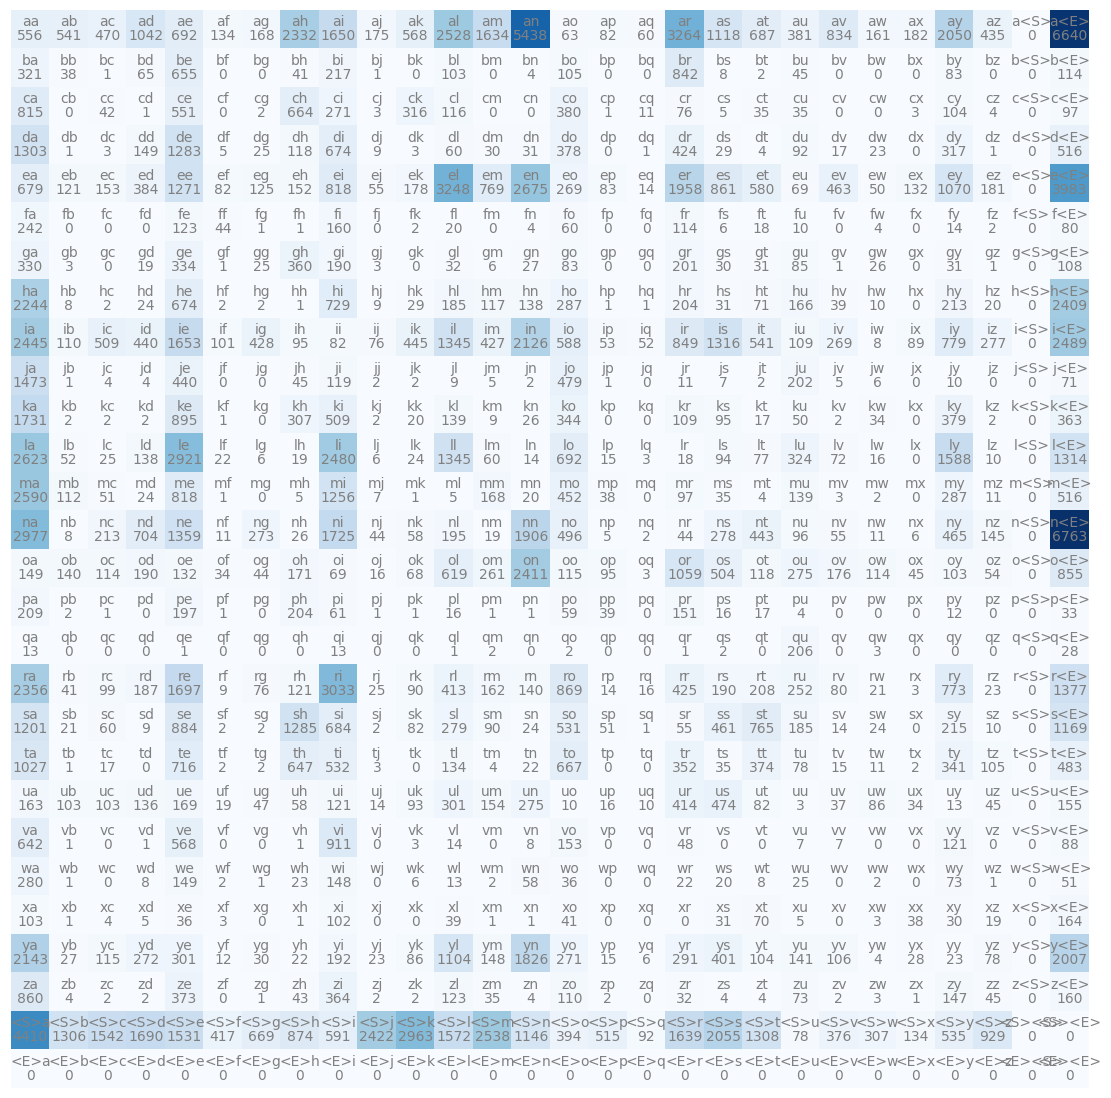

In [13]:
plt.figure(figsize=(14,14))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis('off')

In [14]:
# we can see that some space is been wasted, the something+<S> column and the <E> + something row have only 0 because they will never exist. The reason we were using bracket are because there is a convention in natural language processing that bracket denote special tokens. But let's simplify this in our case.
# build array
N = torch.zeros((27,27), dtype=torch.int32)
# build vocabs dictionary (ie bigrams/tokens list)
chars = sorted(list(set(''.join(words))))
# build "crypter"
stoi = {s:i+1 for i, s in enumerate(chars)}
# move special characters to the front (before in crypter move every "normal" characters by one place)
stoi['.'] = 0
# enter token occurance in token array
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1
# build "decripter"
itos = {i:s for s, i in stoi.items()}

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

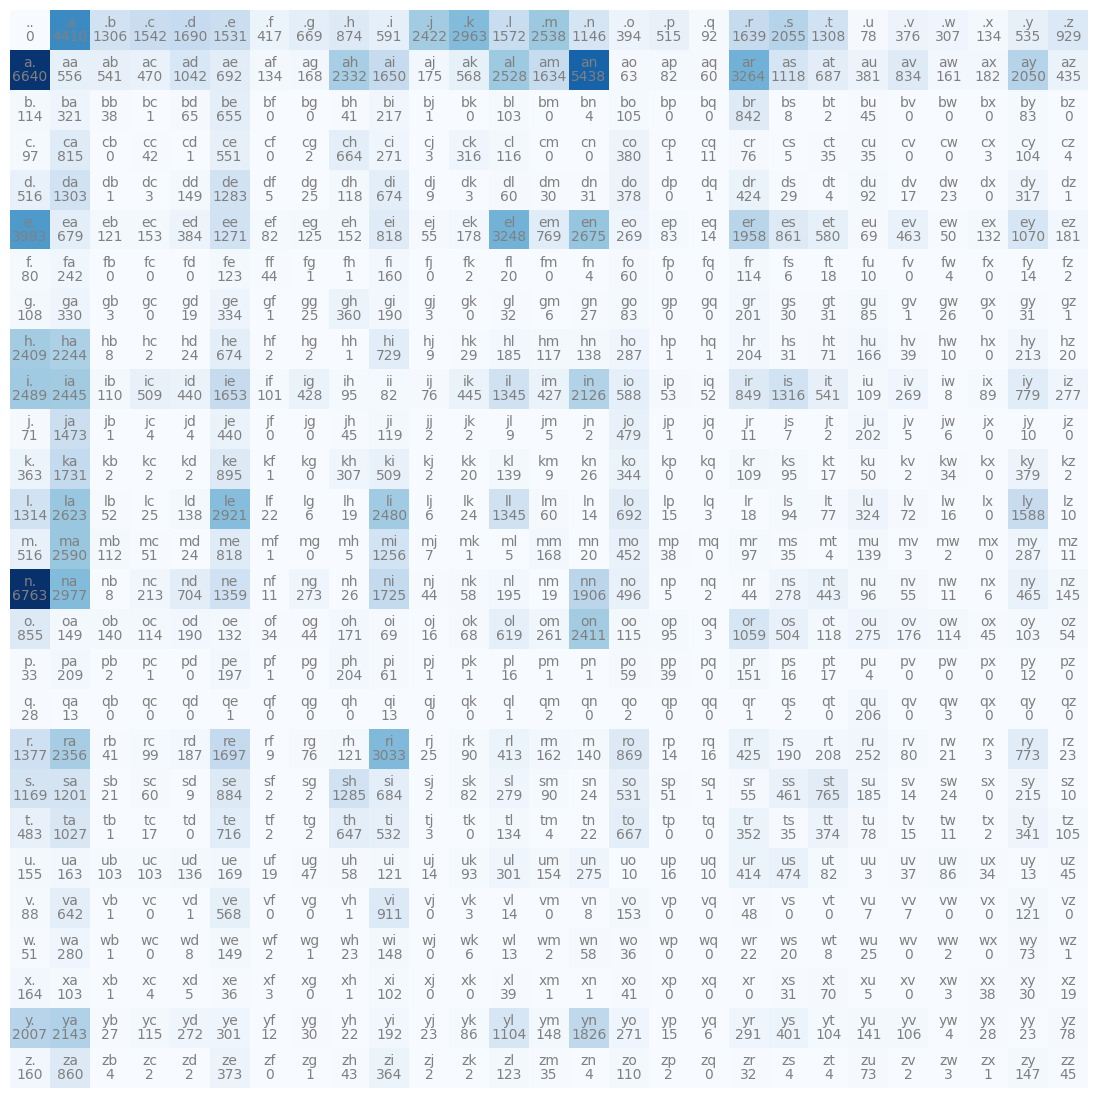

In [15]:
plt.figure(figsize=(14,14))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis('off')

In [16]:
# this give us a one dimension array of the first row (both are the same)
N[0, :]
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [17]:
# let's create a probability vector. First we transform the array of integer into float. Why float ? because we want to normalize their count.
p = N[0].float()
# then we divide by its sum to get the probability
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [15]:
# in pytorch, torch.multinomial allow the user to give a bunch of probabilities and to receive integers which are samples according to the probabilities.
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
print(p)

# now we can draw sample from it
torch.multinomial(p, num_samples=20, replacement=True, generator=g)
# you will see that the samples should roughly follow the prbabilities showed in p (60% for 0, 30% for 1 and 10% for 2)

tensor([0.6064, 0.3033, 0.0903])


tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [16]:
# now we go back to N to build the original p
p = N[0].float()
p = p / p.sum()
g = torch.Generator().manual_seed(2147483647)
# then build an index
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'c'

In [17]:
p.shape

torch.Size([27])

In [18]:
g = torch.Generator().manual_seed(2147483647)


for i in range(15):
    out = []
    ix = 0
    while True:
        p = N[ix].float()
        p/p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))
# if the results look wrong, they aren't. It just looks wrong because bigram model are quite terrible. They only use the raltionship between the first characters and the second and that's it.

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.
ka.
emimmsade.
enkaviyny.
ftlspihinivenvorhlasu.
dsor.


In [19]:
# Let's show you the proof with an equal probability model (torches.ones gives us an array of 1 everywhere). 
g = torch.Generator().manual_seed(2147483647)

for i in range(15):
    out = []
    ix = 0
    while True:
        # p = N[ix].float()
        # p/p.sum()
        p = torch.ones(27) / 27

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

cexzm.
zoglkurkicqzktyhwmvmzimjttainrlkfukzkktda.
sfcxvpubjtbhrmgotzx.
iczixqctvujkwptedogkkjemkmmsidguenkbvgynywftbspmhwcivgbvtahlvsu.
dsdxxblnwglhpyiw.
igwnjwrpfdwipkwzkm.
desu.
firmt.
gbiksjbquabsvoth.
kuysxqevhcmrbxmcwyhrrjenvxmvpfkmwmghfvjzxobomysox.
gbptjapxweegpfwhccfyzfvksiiqmvwbhmiwqmdgzqsamjhgamcxwmmk.
iswcxfmbalcslhy.
fpycvasvz.
bqzazeunschck.
wnkojuoxyvtvfiwksddugnkul.


In [33]:
# now let's fix an ineficienty. we always get the probability by (converting to float, get row and so on). To be faster, let's build and array with the probabilities in it so we can directly take the with and index.
P = (N+1).float()
# so we would like a P = P / P.sum() but P.sum() give us a sum of each elements in the two dimensionals array which isn't what we want. pytorch give us something for this. Here, the .sum isn't the classic .sum but the pytorch one.
P /= P.sum(1, keepdim=True)
# we broacasted a [27, 1] array on a [27, 27]
P.shape

torch.Size([27, 27])

In [34]:
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
    out = []
    ix = 0
    out.append(itos[ix])
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

.cexze.
.momasurailezitynn.
.konimittain.
.llayn.
.ka.


In [22]:
for w in words[:3]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        print(f'{ch1}{ch2} - {prob:.4f}')

.e - 0.0478
em - 0.0377
mm - 0.0253
ma - 0.3899
a. - 0.1960
.o - 0.0123
ol - 0.0780
li - 0.1777
iv - 0.0152
vi - 0.3541
ia - 0.1381
a. - 0.1960
.a - 0.1377
av - 0.0246
va - 0.2495
a. - 0.1960


In [35]:
# now let's get the likelihood (the product of theses probabilities) For convenience to not work with such small number people work with the log likelihood
log_likelihood = 0
count = 0
for w in words[:3]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        count += 1
        print(f'{ch1}{ch2} - {prob:.4f} - {log_prob:.4f}')
# the worse the probability is (more distant from 1) the worse/bigger the likelihood log is. 
# log(a*b*c) = log(a) + log(b) + log(c)
print(log_likelihood)

.e - 0.0478 - -3.0410
em - 0.0377 - -3.2793
mm - 0.0253 - -3.6753
ma - 0.3885 - -0.9454
a. - 0.1958 - -1.6305
.o - 0.0123 - -4.3965
ol - 0.0779 - -2.5526
li - 0.1774 - -1.7293
iv - 0.0152 - -4.1845
vi - 0.3508 - -1.0476
ia - 0.1380 - -1.9807
a. - 0.1958 - -1.6305
.a - 0.1376 - -1.9835
av - 0.0246 - -3.7041
va - 0.2473 - -1.3971
a. - 0.1958 - -1.6305
tensor(-38.8086)


In [36]:
# now we don't really like this log_likelihood because we want a loss function. A semantic that low is good. So let's invert this
nll = -log_likelihood
print(nll)
# now, the lower it can be is 0 and the higer it is the less likely the result was according to the probabilities array. Then we normalize it
print(nll/count) # <= what we call Loss Function

tensor(38.8086)
tensor(2.4255)


In [28]:
# To summarize : maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is a monotonic function)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood <= loss function

In [29]:
# Up to now, the numbers (probabilities) are being kept in a two dimensional array. But what we want is for them to be kept in a neural network

In [ ]:
# We have a small problem and that is that some bigram have a probability of 0, which make them impossible to occur which is actually wrong. For this, there is a technique called model Smoothing. In rough words, it means adding something to each probability. The bigger the number we add the more the probability will tend to look equals.
# So this P = N.float becomes P = (N+1).float

AttributeError: 'builtin_function_or_method' object has no attribute 'sum'